In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from os import path
from glob import glob
import sys
sys.path.insert(0, path.abspath('./'))
import matplotlib.patches as mpatches

from src import workdir, parse_model_parameter_file
from src.emulator_BAND import EmulatorBAND
from src.emulator import Emulator


In [2]:
model_par = "../data/modelDesign_3DMCGlauber.txt"
training_set = "../data/AuAu7.7_dNdy.pkl"

In [3]:
emu1 = EmulatorBAND(training_set, model_par, method='PCGP')
emu2 = EmulatorBAND(training_set, model_par, method='PCSK')
emu3 = Emulator(training_set, model_par, npc = 3)

[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator_BAND] Training dataset size: 1000
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator_BAND] Training dataset size: 1000
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator] Training dataset size: 1000
[INFO][emulator] All training data are loaded.


In [4]:
output_emu1 = emu1.testEmulatorErrors(number_test_points=800, number_iterations=1)

emu_pred_1 = output_emu1[0]
emu_pred_err_1 = output_emu1[1]
vali_data_1 = output_emu1[2]
vali_data_err_1 = output_emu1[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 200 training points ...


In [5]:
output_emu2 = emu2.testEmulatorErrors(number_test_points=800, number_iterations=1)

emu_pred_2 = output_emu2[0]
emu_pred_err_2 = output_emu2[1]
vali_data_2 = output_emu2[2]
vali_data_err_2 = output_emu2[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 200 training points ...


In [6]:
output_emu3 = emu3.testEmulatorErrors(nTestPoints=800, nIters=1)

emu_pred_3 = output_emu3[0]
emu_pred_err_3 = output_emu3[1]
vali_data_3 = output_emu3[2]
vali_data_err_3 = output_emu3[3]

[INFO][emulator] Validating GP emulators iter = 0 ...
[INFO][emulator] Perforing PCA ...
[INFO][emulator] 3 PCs explain 0.99378 of variance
[INFO][emulator] Train GP emulators with 200 training points ...
[INFO][emulator] GP 0: 0.91158 of variance, LML = -96.104, Score = 0.95, kernel: 2.34**2 * RBF(length_scale=[2.4e+03, 9.36, 1.2, 23.3, 300, 14.2, 3.17, 23, 1.36, 1.31, 100, 3.64, 29.9, 29.9, 29.9, 0.946, 20, 20, 0.354, 14, 0.623, 1.49]) + WhiteKernel(noise_level=0.01)
[INFO][emulator] GP 1: 0.05766 of variance, LML = -163.4, Score = 0.95, kernel: 1.74**2 * RBF(length_scale=[2.4e+03, 6.97, 0.941, 200, 21.7, 70, 9.47, 2.65, 0.387, 1.28, 100, 1.26, 29.9, 1.66, 29.9, 0.565, 6.36, 20, 0.259, 14, 0.213, 2.25]) + WhiteKernel(noise_level=0.01)
[INFO][emulator] GP 2: 0.02454 of variance, LML = -179.1, Score = 0.95, kernel: 1.47**2 * RBF(length_scale=[101, 3.11, 0.853, 200, 300, 70, 2.63, 2.28, 0.554, 0.612, 100, 1.12, 29.9, 29.9, 0.745, 0.345, 1.22, 20, 0.535, 14, 0.859, 0.815]) + WhiteKernel(

In [7]:
def plot_emulator_vs_truth(vali_data,vali_data_err,emu_pred,emu_pred_err):
    nValidationPoints, nObs = vali_data_1.shape

    for obsIdx in range(nObs):
        fig = plt.figure()
        ax = plt.axes([0.12, 0.12, 0.83, 0.83])
        plt.errorbar(vali_data[:, obsIdx], emu_pred[:, obsIdx],
                    yerr=np.sqrt(emu_pred_err[:, obsIdx,obsIdx]),
                    xerr=vali_data_err[:, obsIdx],
                    marker="o", linestyle="")
        plt.plot([-200, 200], [-200, 200], '--k')
        plt.xlim([vali_data[:, obsIdx].min() - 1,
                vali_data[:, obsIdx].max() + 1])
        plt.ylim([emu_pred[:, obsIdx].min() - 1,
                emu_pred[:, obsIdx].max() + 1])
        ax.set_aspect('equal')
        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        plt.xlabel("truth")
        plt.ylabel("emulator results")

def plot_emulator_vs_truth_relative(vali_data,vali_data_err,emu_pred,emu_pred_err):
    nValidationPoints, nObs = vali_data.shape

    for obsIdx in range(nObs):
        fig = plt.figure()
        ax = plt.axes([0.12, 0.12, 0.83, 0.83])
        plt.plot(range(len(vali_data)),
                (emu_pred[:, obsIdx] - vali_data[:, obsIdx])/np.sqrt(vali_data_err[:, obsIdx]**2.+ emu_pred_err[:, obsIdx, obsIdx]),
                marker="o", linestyle="")
        plt.fill_between([-nValidationPoints, nValidationPoints], [2, 2], [-2, -2], color='g', alpha=0.2)
        plt.xlim([-1,len(vali_data)+1])
        plt.ylim([-4, 4])
        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        plt.xlabel("test point")
        plt.ylabel("relative diff. [$\sigma$]")

def plot_histogram_emulator_vs_truth_relative(vali_data_list,emu_pred_list,emu_pred_err_list,dataset_labels=None):
    if not isinstance(vali_data_list, list):
        vali_data_list = [vali_data_list]
    if not isinstance(emu_pred_list, list):
        emu_pred_list = [emu_pred_list]
    if not isinstance(emu_pred_err_list, list):
        emu_pred_err_list = [emu_pred_err_list]
    if not isinstance(dataset_labels, list):
        dataset_labels = [dataset_labels]
    
    nObs = vali_data_list[0].shape[1]  # Assuming all datasets have the same number of observables

    for obsIdx in range(nObs):
        fig, ax = plt.subplots()
        ax.set_xlabel("A = (GP-truth)/GPerr")
        ax.set_ylabel("p(A)")
        
        moments = []
        handles = []
        for vali_data, emu_pred, emu_pred_err, label in zip(vali_data_list, emu_pred_list, emu_pred_err_list, dataset_labels):
            A = (emu_pred[:, obsIdx] - vali_data[:, obsIdx]) / np.sqrt(emu_pred_err[:, obsIdx, obsIdx])
            ax.hist(A, bins=25, density=True, histtype='step', label=label)

            # Compute first four moments of the histogram
            mean = np.mean(A)
            variance = np.mean((A - mean)**2.)
            skewness = np.mean((A - mean)**3.) / variance**(3./2.)
            kurtosis = np.mean((A - mean)**4.) / variance**(4./2.)
            moment_string = f'μ={mean:.2f}, σ²= {variance:.2f}, γ₁={skewness:.2f}, γ₂={kurtosis:.2f}'
            moments.append((label, moment_string))

            patch = mpatches.Patch(color='none', label=label)
            handles.append(patch)

        x = np.linspace(-6, 6, 300)
        y = (1 / (np.sqrt(2*np.pi))) * np.exp(-0.5 * x**2)        
        plt.plot(x, y, color = 'black', zorder = 2, linewidth = 2, label = 'Normal dist.')

        ax.text(0.05, 0.8, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        ax.legend()

        # Add a separate legend for the moment strings
        ax2 = ax.twinx()
        ax2.legend(handles, moments, loc='upper left', fontsize=6)
        ax2.axis('off')  # Turn off the axis for the second legend
        plt.tight_layout() 
        plt.show()

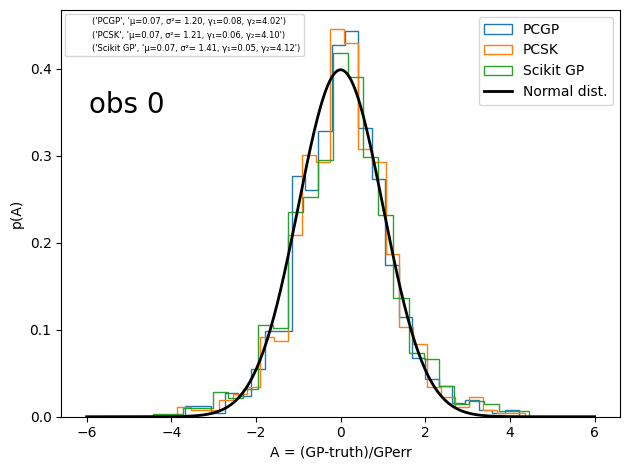

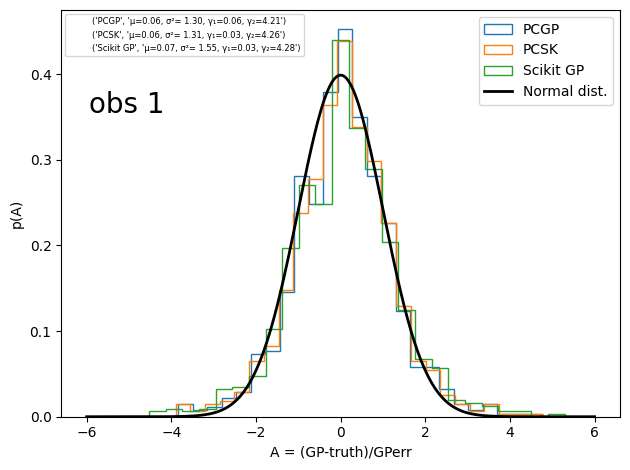

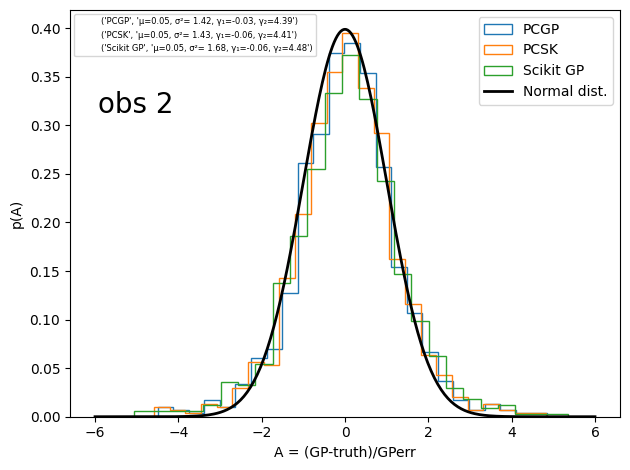

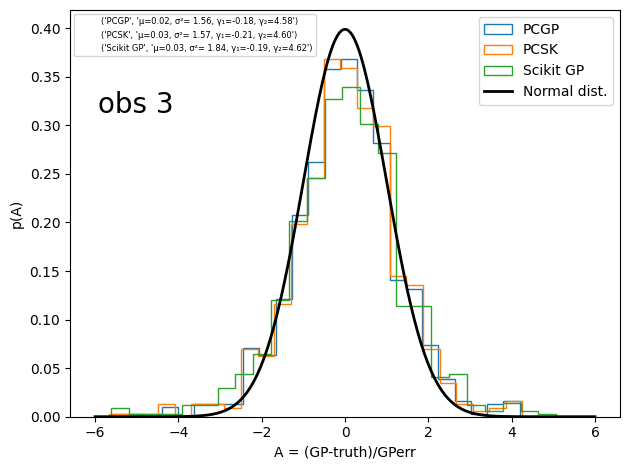

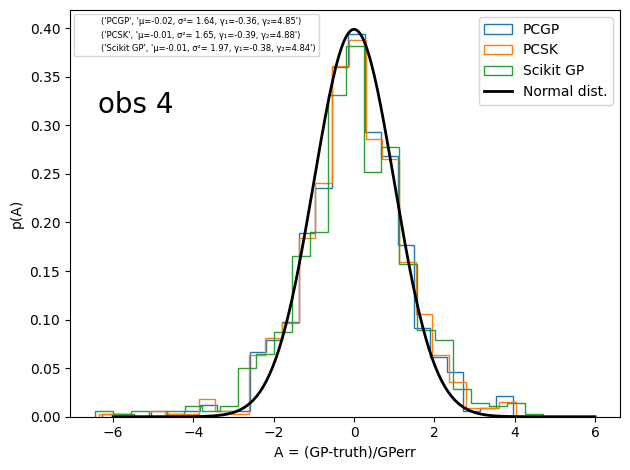

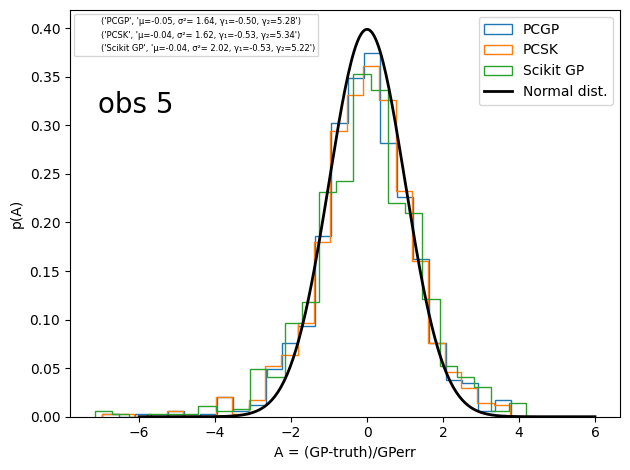

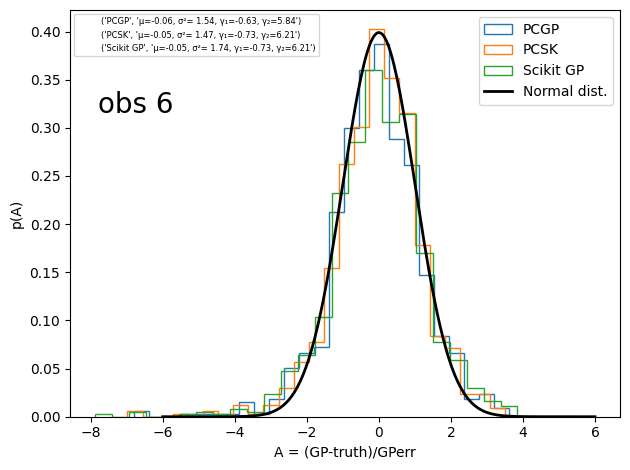

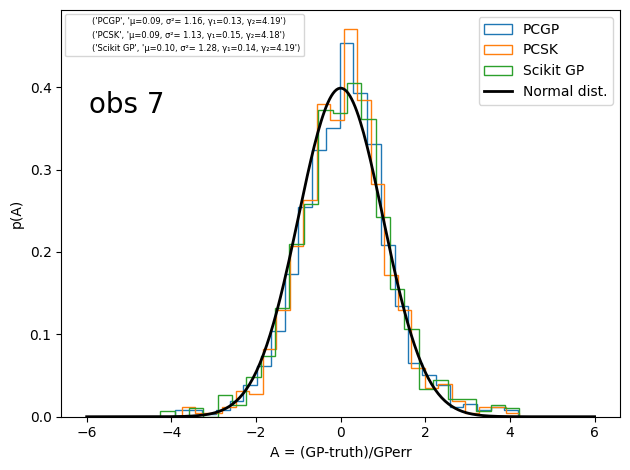

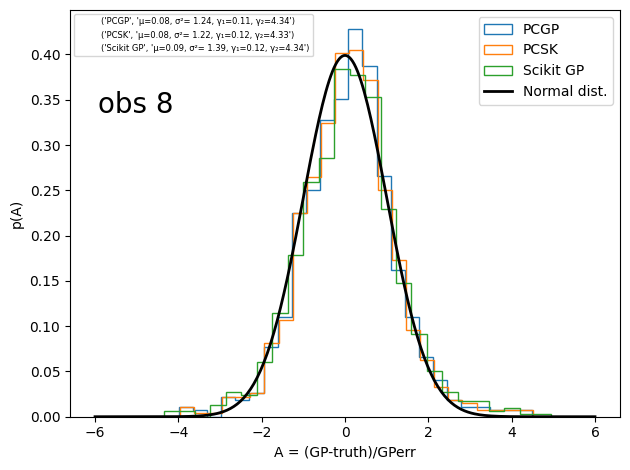

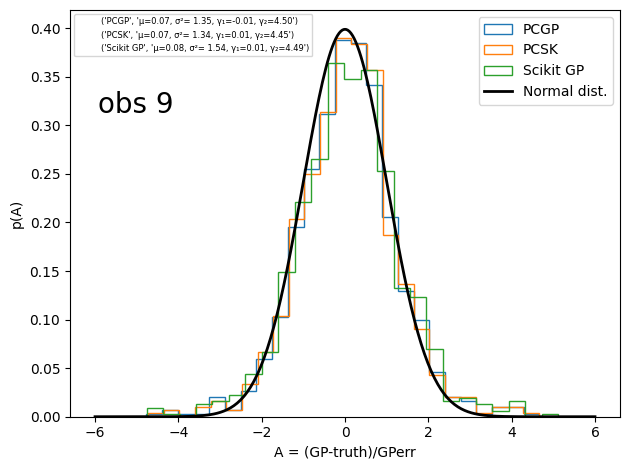

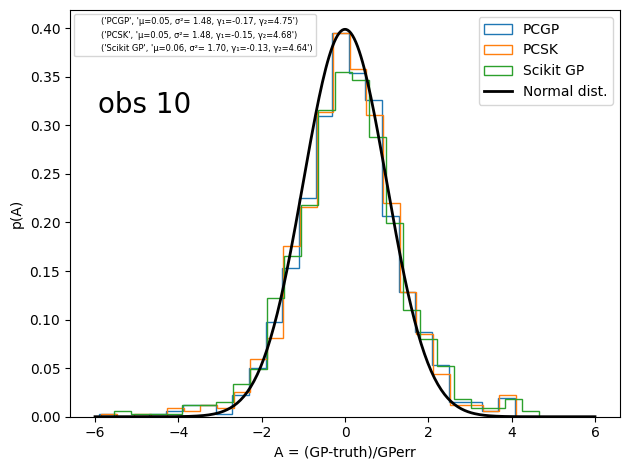

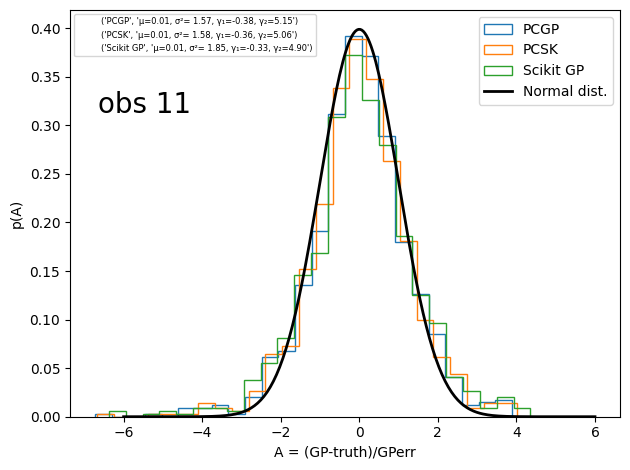

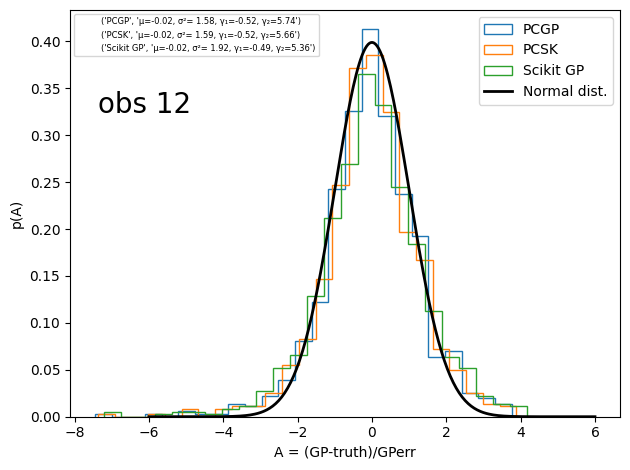

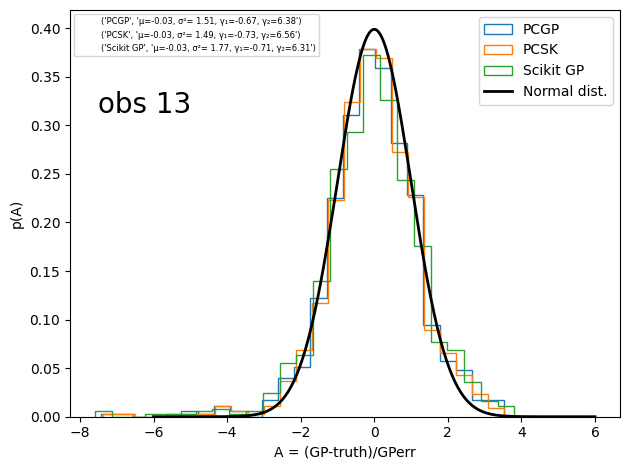

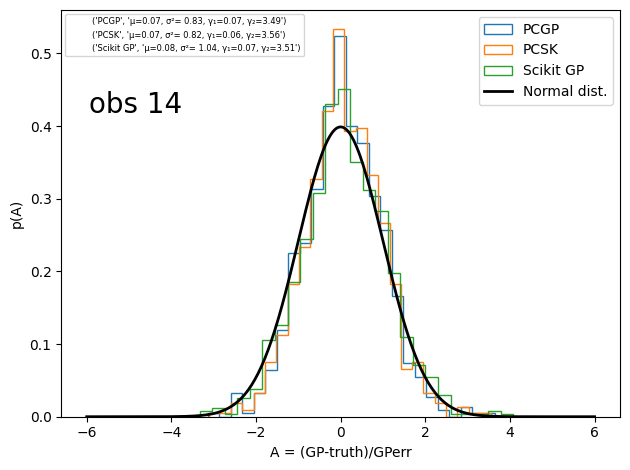

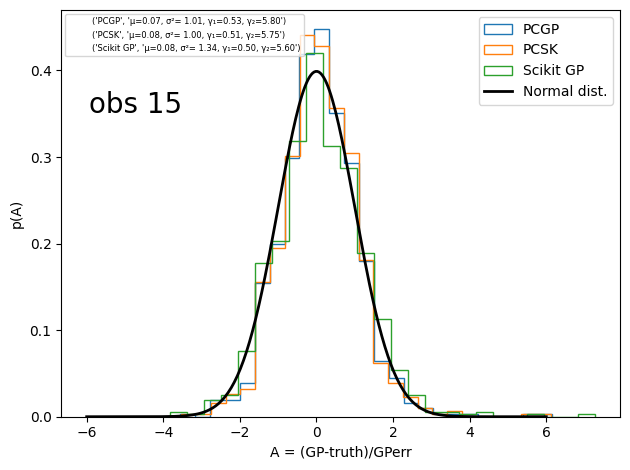

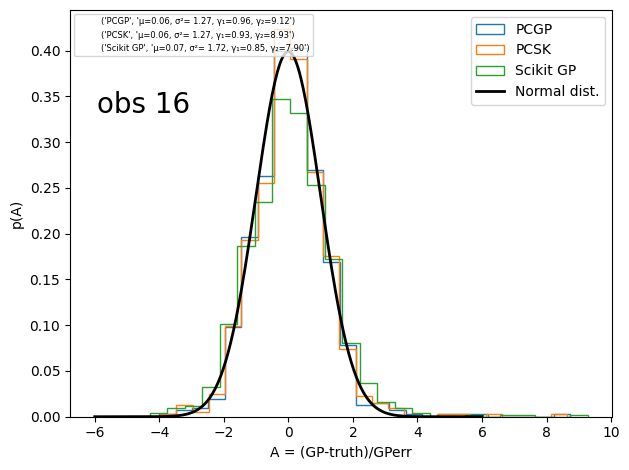

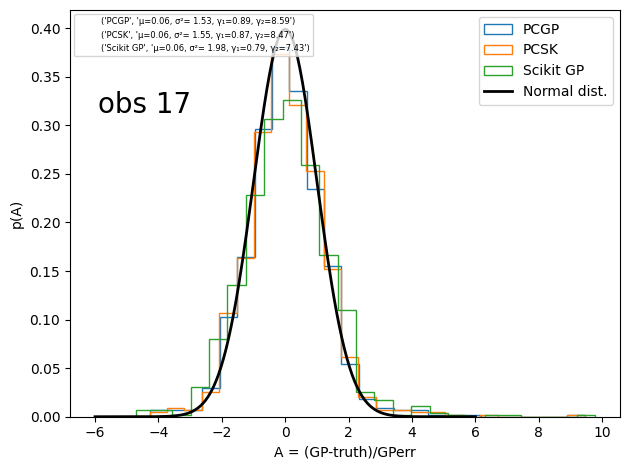

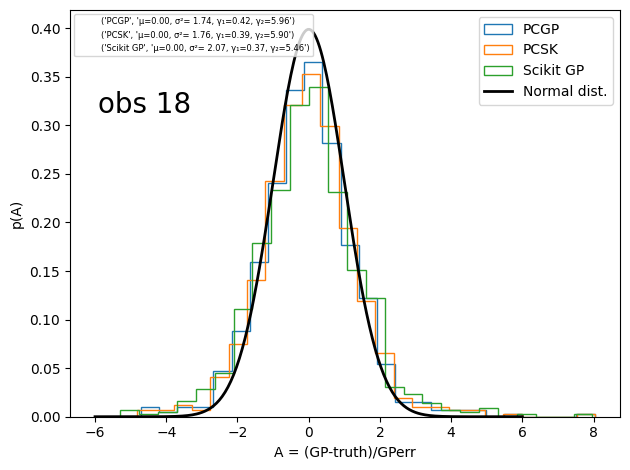

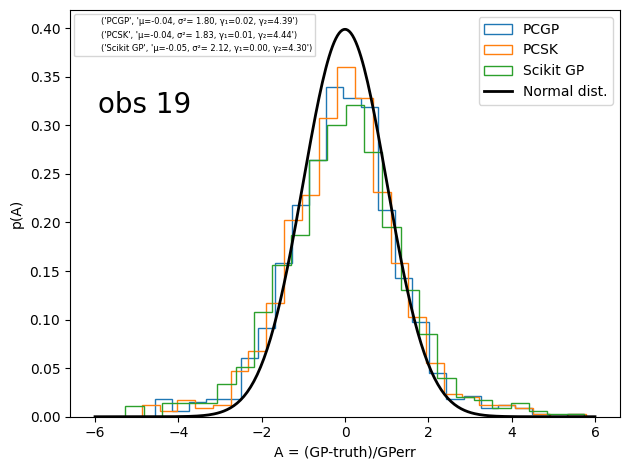

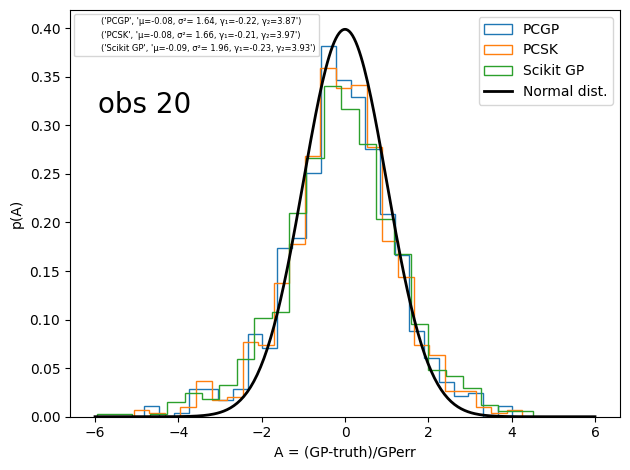

In [8]:
vali = [vali_data_1,vali_data_2,vali_data_3]
emu = [emu_pred_1, emu_pred_2,emu_pred_2]
emu_err = [emu_pred_err_1,emu_pred_err_2,emu_pred_err_3]
lab = ['PCGP', 'PCSK', 'Scikit GP']

plot_histogram_emulator_vs_truth_relative(vali,emu,emu_err,lab)

In [9]:
model_par = "../data/modelDesign_3DMCGlauber.txt"
training_set_vn = "../data/AuAu7.7_pTvn.pkl"

In [10]:
emu1_vn = EmulatorBAND(training_set_vn, model_par, method='PCGP')
emu2_vn = EmulatorBAND(training_set_vn, model_par, method='PCSK')
emu3_vn = Emulator(training_set_vn, model_par, npc = 3)

[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_pTvn.pkl ...
[INFO][emulator_BAND] Discard Parameter 023, stat err = 0.32
[INFO][emulator_BAND] Discard Parameter 036, stat err = 0.10
[INFO][emulator_BAND] Discard Parameter 042, stat err = 0.19
[INFO][emulator_BAND] Discard Parameter 057, stat err = 0.10
[INFO][emulator_BAND] Discard Parameter 074, stat err = 0.10
[INFO][emulator_BAND] Discard Parameter 079, stat err = 0.12
[INFO][emulator_BAND] Discard Parameter 084, stat err = 0.10
[INFO][emulator_BAND] Discard Parameter 090, stat err = 0.23
[INFO][emulator_BAND] Discard Parameter 091, stat err = 0.11
[INFO][emulator_BAND] Discard Parameter 131, stat err = 0.16
[INFO][emulator_BAND] Discard Parameter 148, stat err = 0.23
[INFO][emulator_BAND] Discard Parameter 188, stat err = 0.11
[INFO][emulator_BAND] Discard Parameter 198, stat err = 0.11
[INFO][emulator_BAND] Discard Parameter 233, stat err = 0.13
[INFO][emulator_BAND] Discard Parameter 253, stat err = 0.11
[INFO][

In [11]:
output_emu1_vn = emu1_vn.testEmulatorErrors(number_test_points=800, number_iterations=1)

emu_pred_1_vn = output_emu1_vn[0]
emu_pred_err_1_vn = output_emu1_vn[1]
vali_data_1_vn = output_emu1_vn[2]
vali_data_err_1_vn = output_emu1_vn[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 160 training points ...


In [12]:
output_emu2_vn = emu2_vn.testEmulatorErrors(number_test_points=800, number_iterations=1)

emu_pred_2_vn = output_emu2_vn[0]
emu_pred_err_2_vn = output_emu2_vn[1]
vali_data_2_vn = output_emu2_vn[2]
vali_data_err_2_vn = output_emu2_vn[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 160 training points ...


In [13]:
output_emu3_vn = emu3_vn.testEmulatorErrors(nTestPoints=800, nIters=1)

emu_pred_3_vn = output_emu3_vn[0]
emu_pred_err_3_vn = output_emu3_vn[1]
vali_data_3_vn = output_emu3_vn[2]
vali_data_err_3_vn = output_emu3_vn[3]

[INFO][emulator] Validating GP emulators iter = 0 ...
[INFO][emulator] Perforing PCA ...
[INFO][emulator] 3 PCs explain 0.97913 of variance
[INFO][emulator] Train GP emulators with 160 training points ...
[INFO][emulator] GP 0: 0.82680 of variance, LML = -61.143, Score = 0.95, kernel: 2.05**2 * RBF(length_scale=[2.4e+03, 8.13, 3.63, 200, 300, 7, 100, 100, 0.611, 1.07, 100, 1.39, 29.9, 29.9, 29.9, 20, 20, 3.65, 10, 14, 1.82, 6.64]) + WhiteKernel(noise_level=0.01)
[INFO][emulator] GP 1: 0.14008 of variance, LML = -123.31, Score = 0.95, kernel: 2.42**2 * RBF(length_scale=[2.4e+03, 100, 1.6, 200, 300, 9.39, 11.4, 2.34, 0.394, 0.829, 100, 2.49, 29.9, 29.9, 3.12, 0.535, 20, 20, 0.421, 14, 0.533, 35]) + WhiteKernel(noise_level=0.01)
[INFO][emulator] GP 2: 0.01224 of variance, LML = -179.71, Score = 0.96, kernel: 1.54**2 * RBF(length_scale=[2.4e+03, 3.26, 2.04, 200, 300, 3.3, 100, 100, 0.131, 0.598, 100, 0.969, 0.721, 29.9, 29.9, 0.54, 20, 20, 10, 0.709, 0.162, 0.45]) + WhiteKernel(noise_level

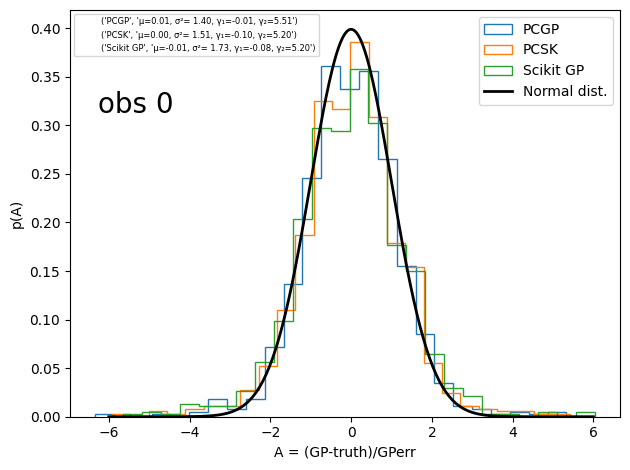

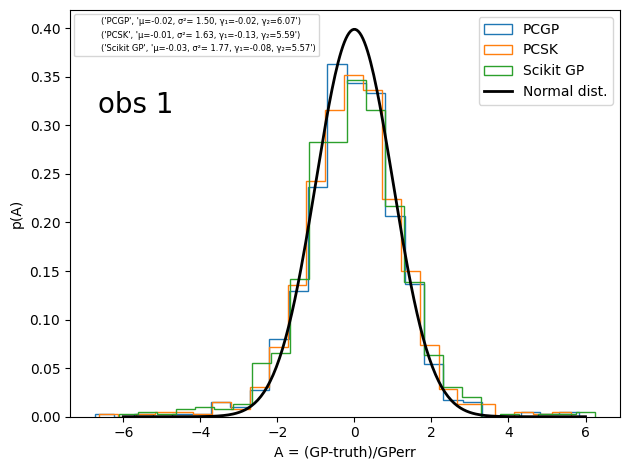

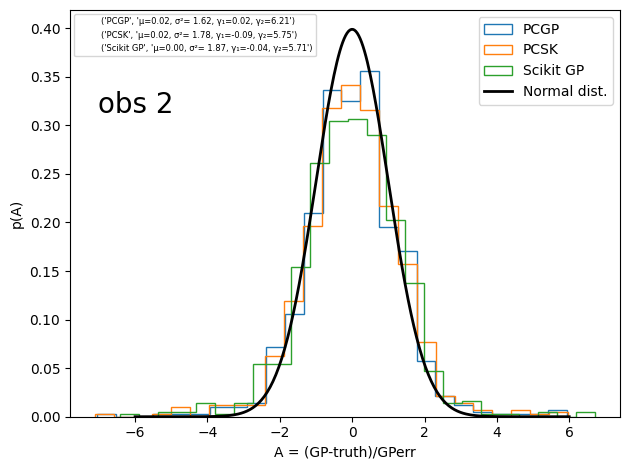

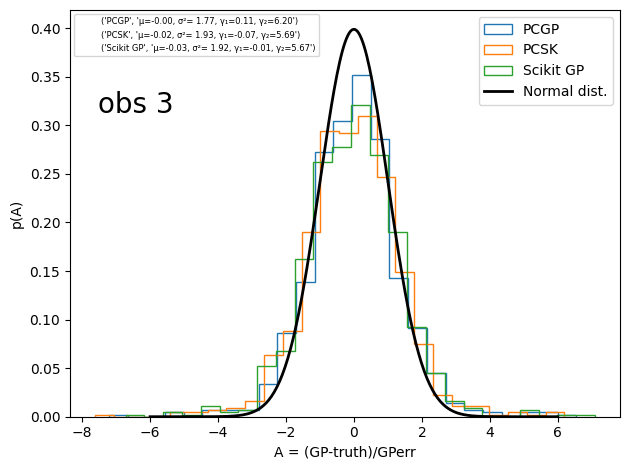

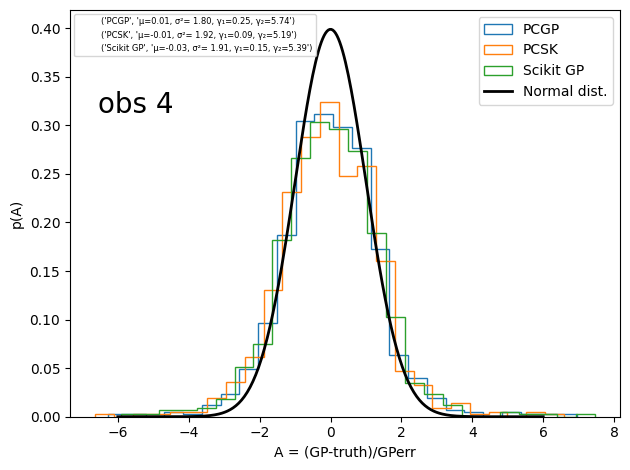

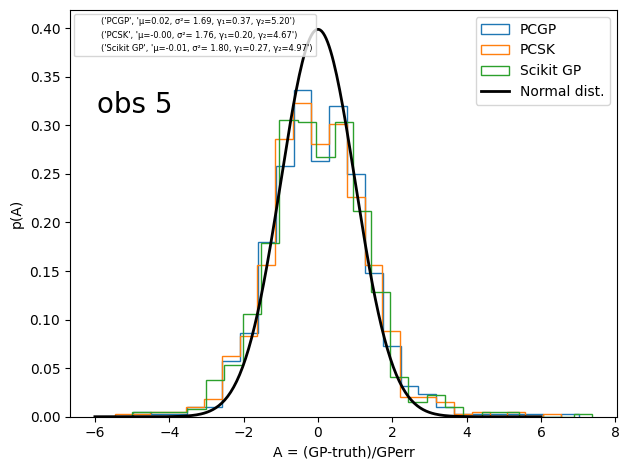

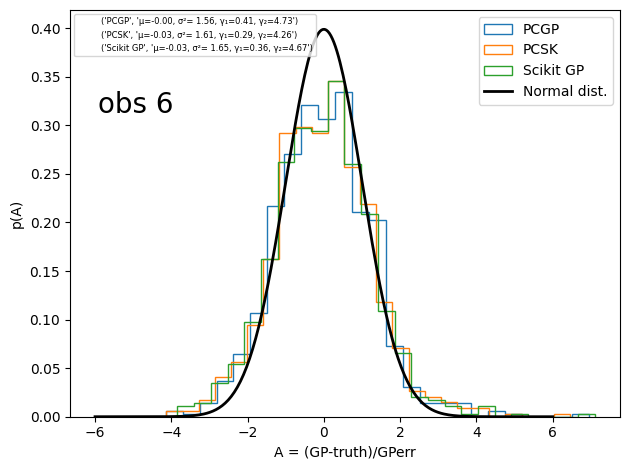

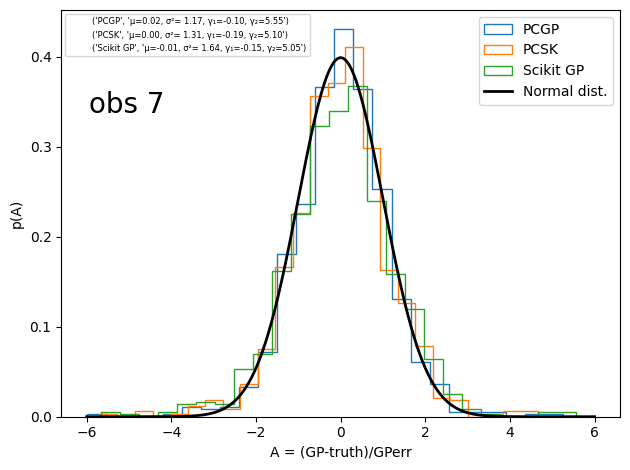

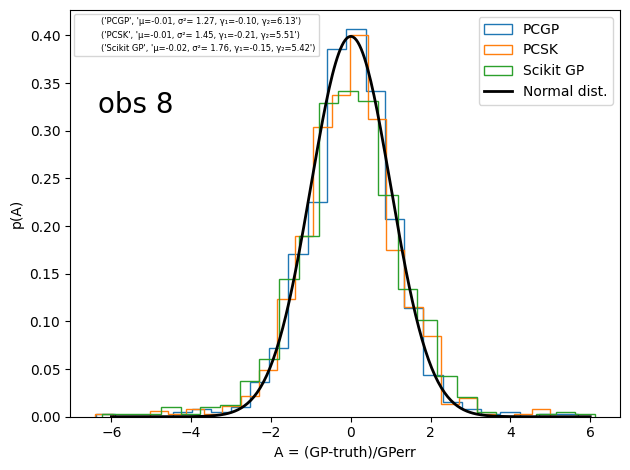

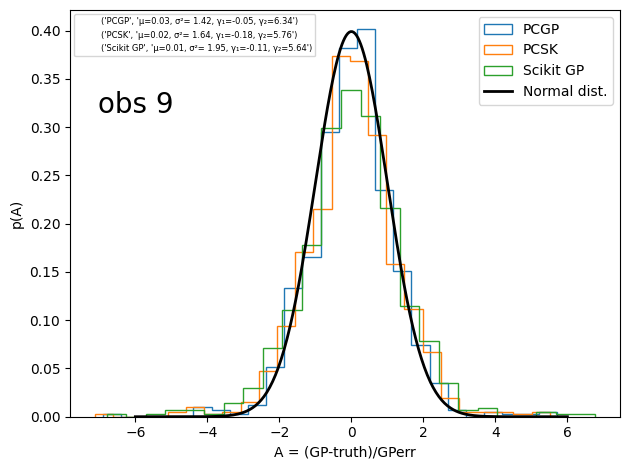

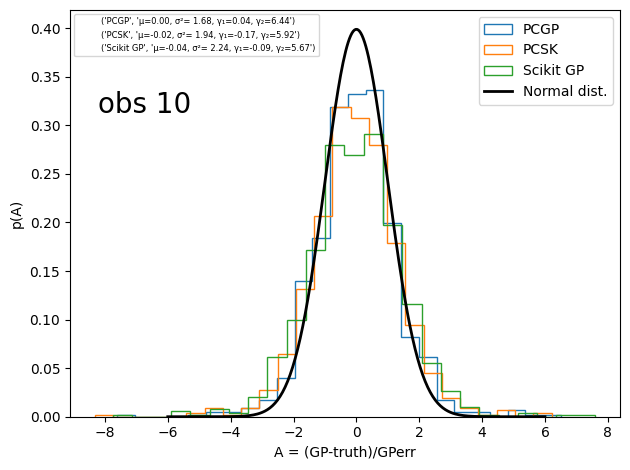

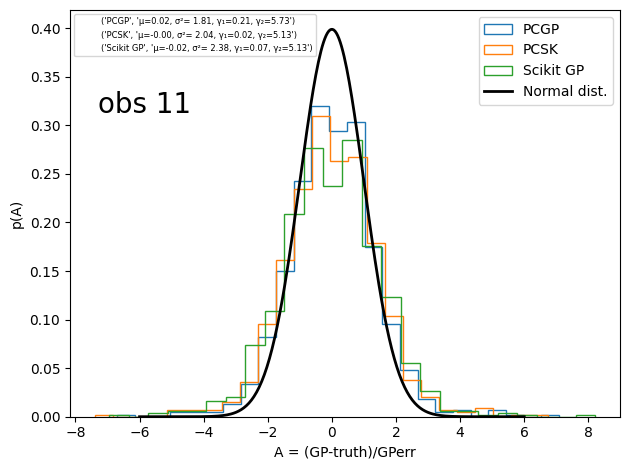

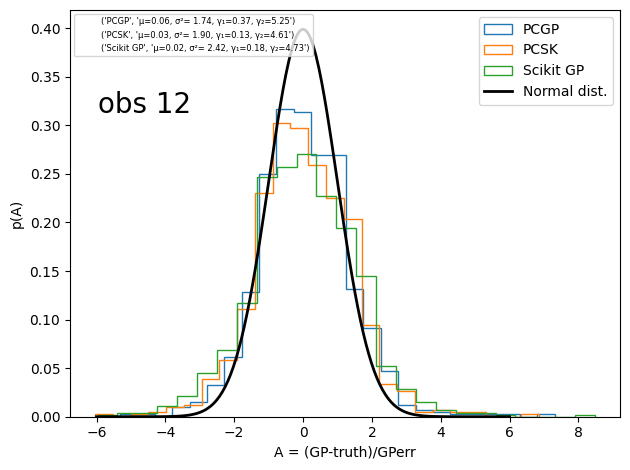

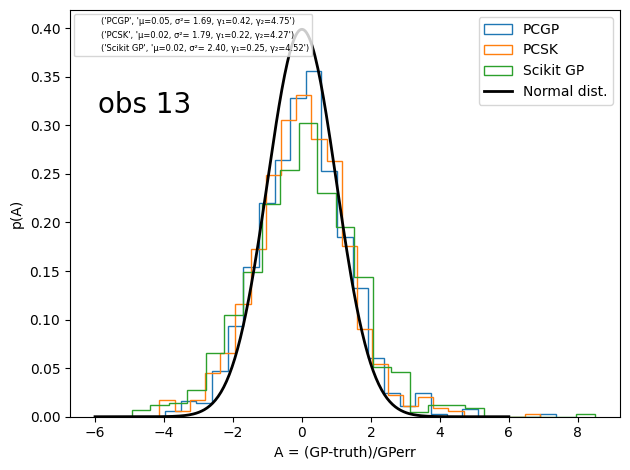

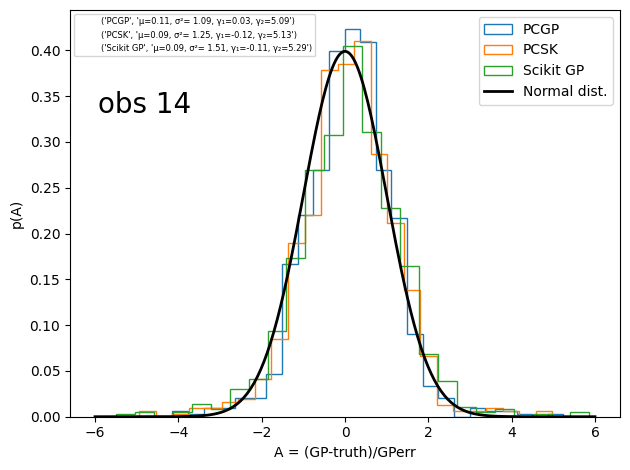

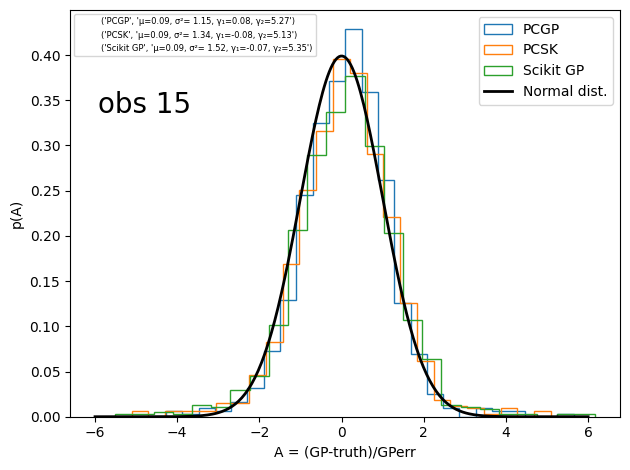

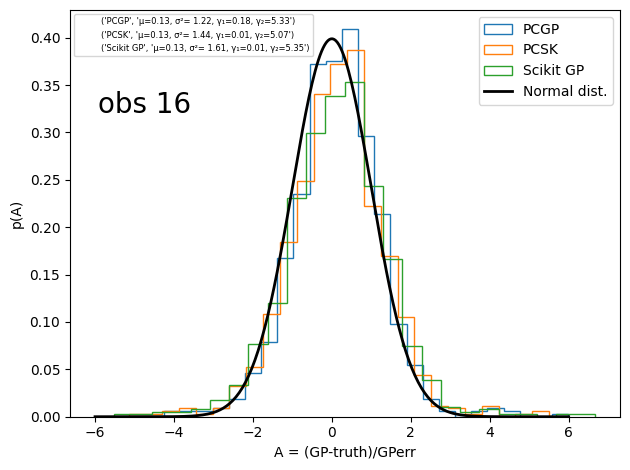

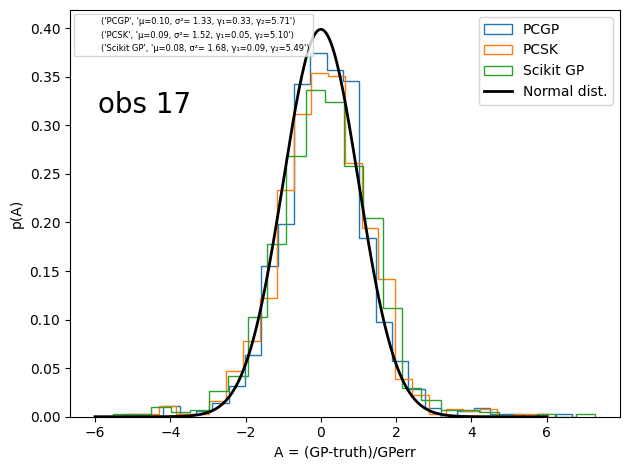

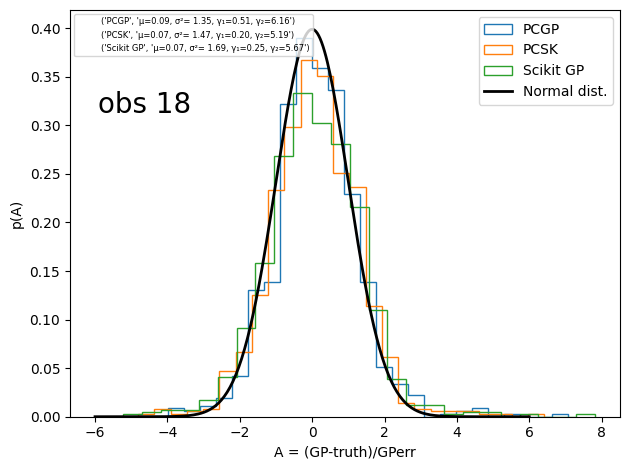

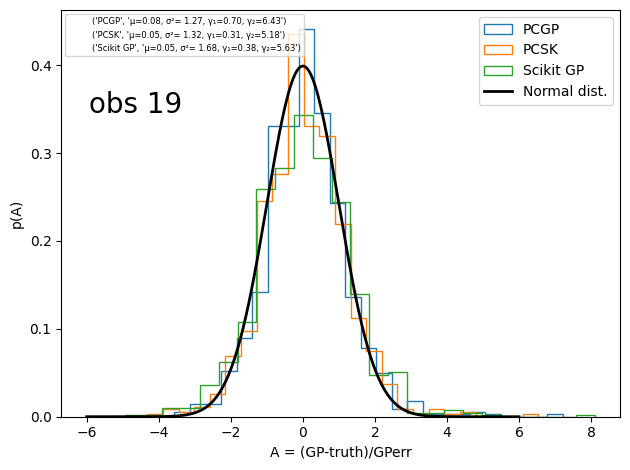

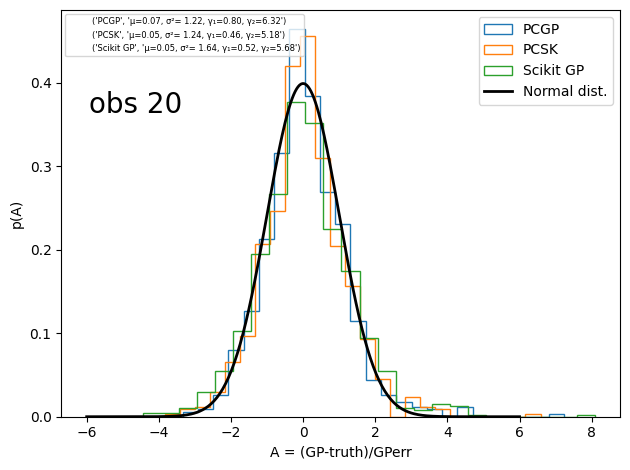

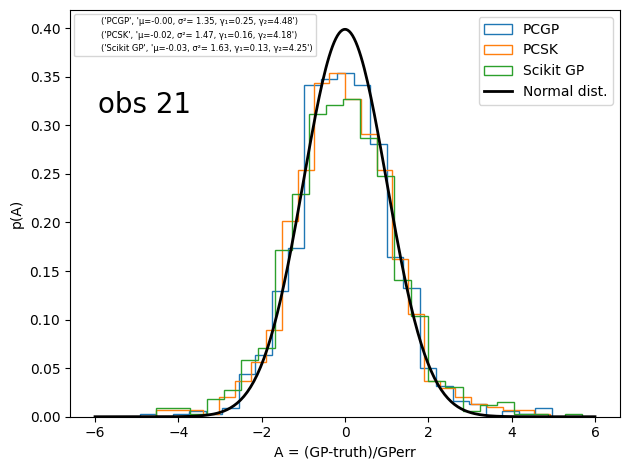

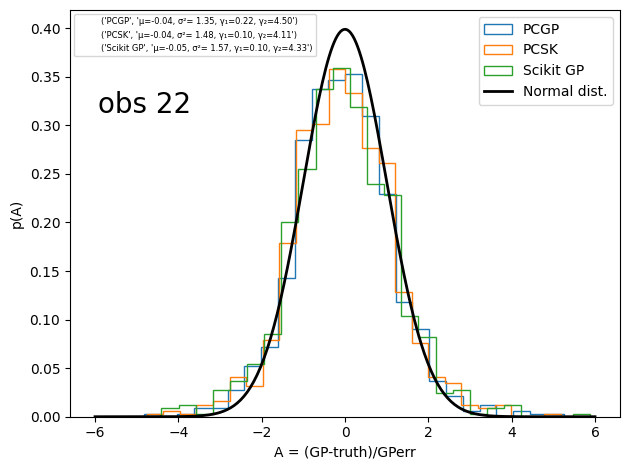

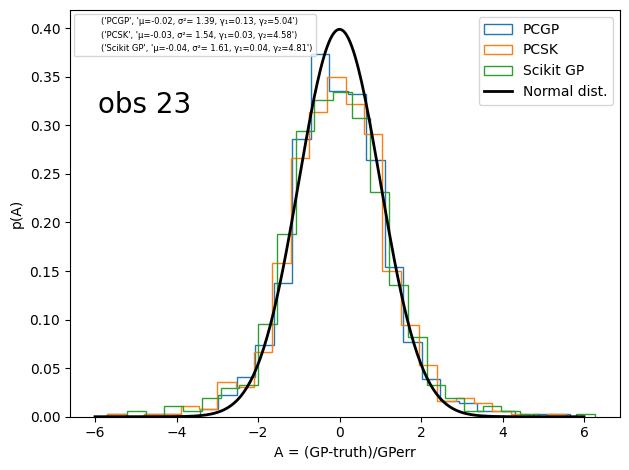

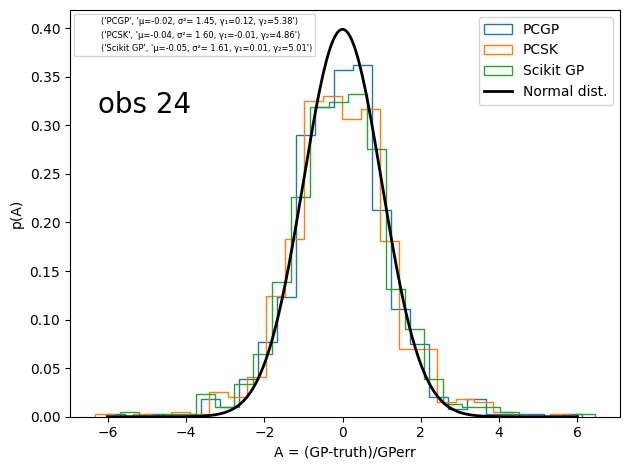

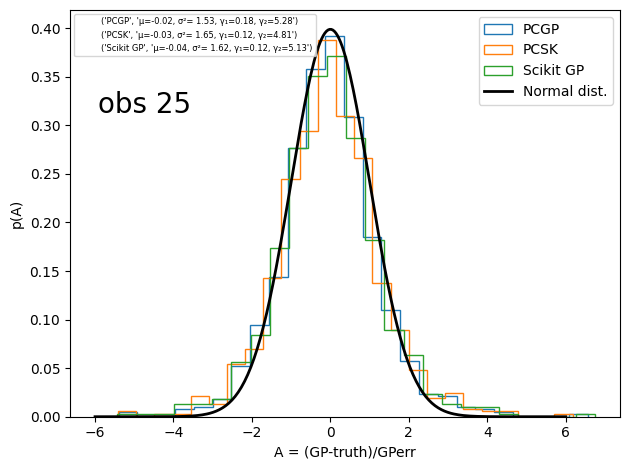

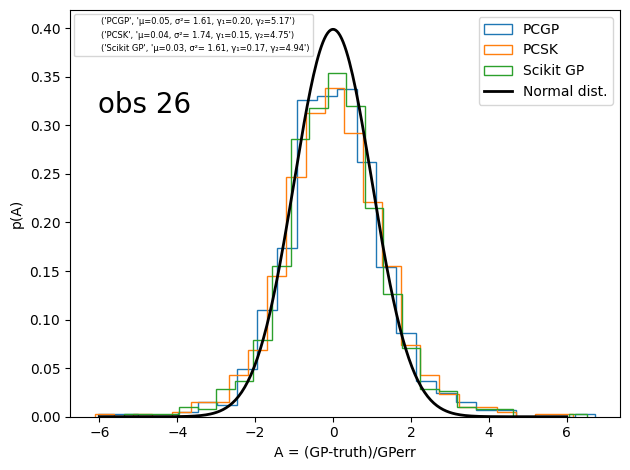

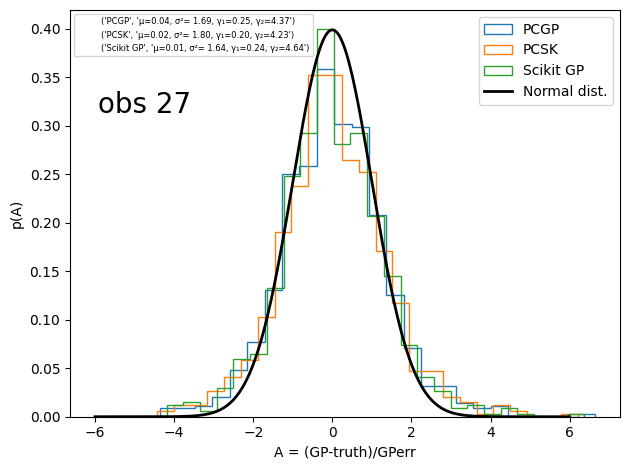

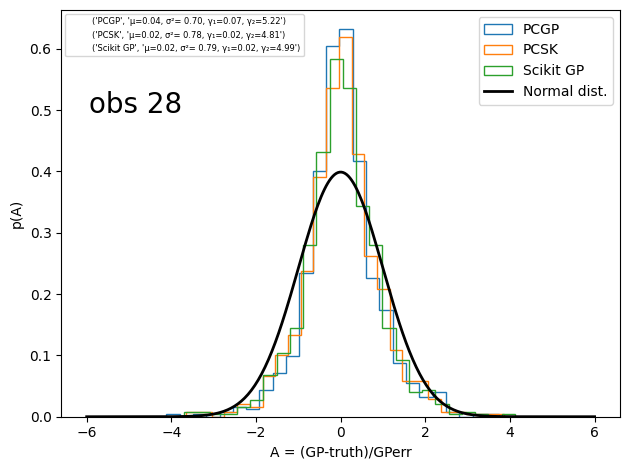

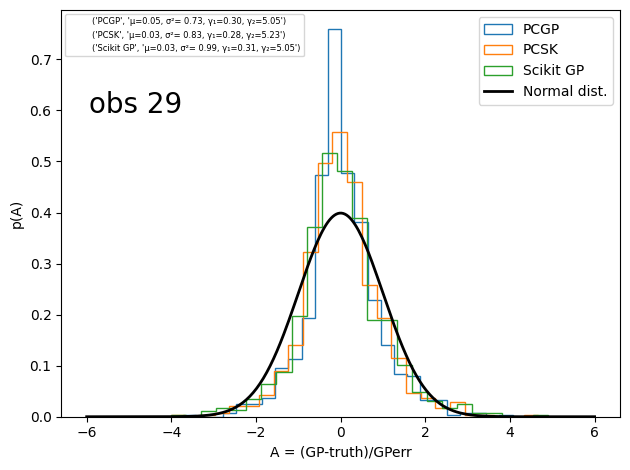

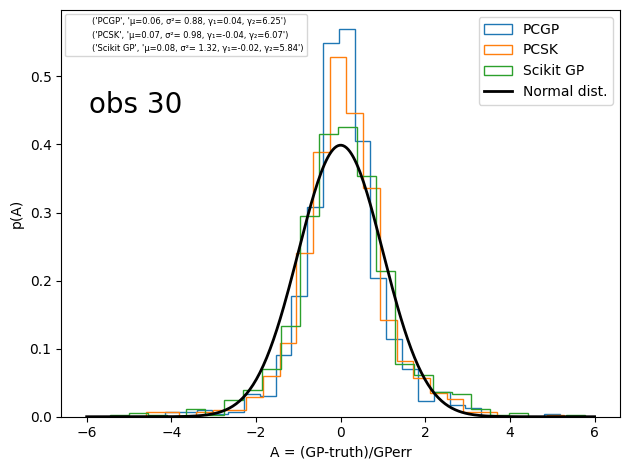

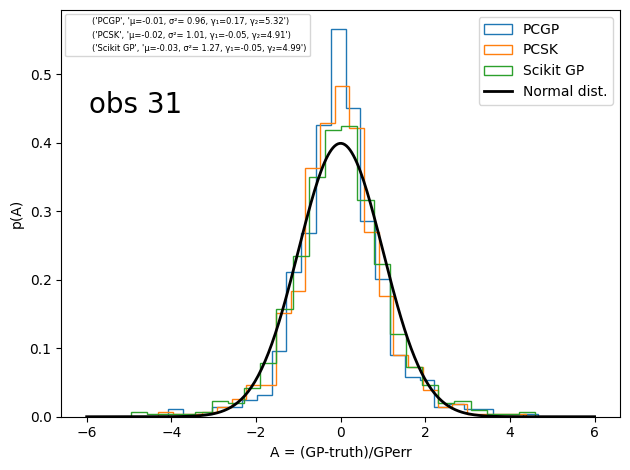

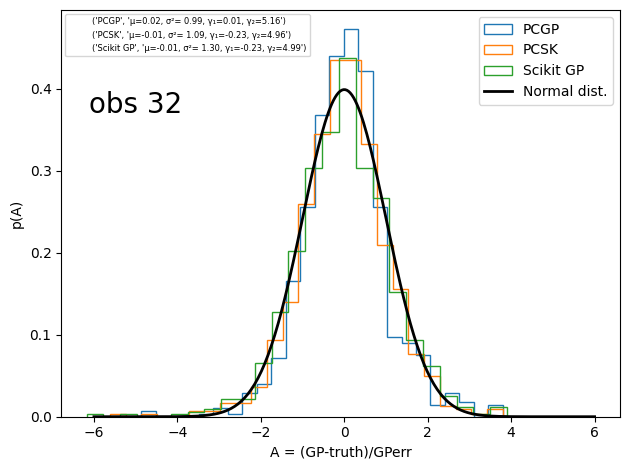

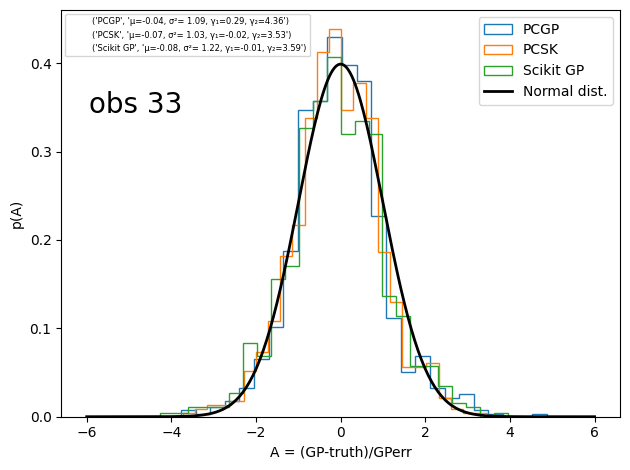

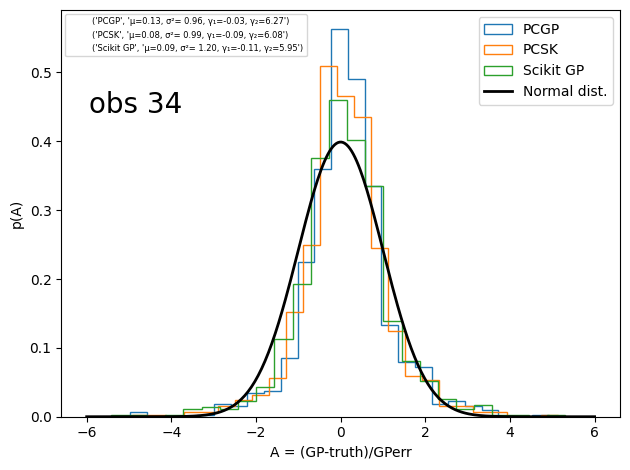

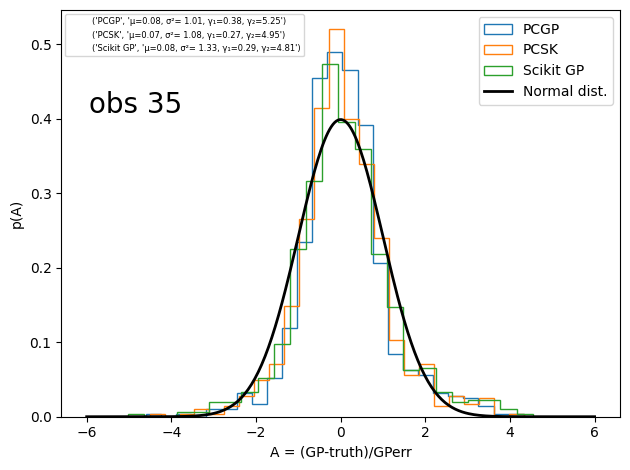

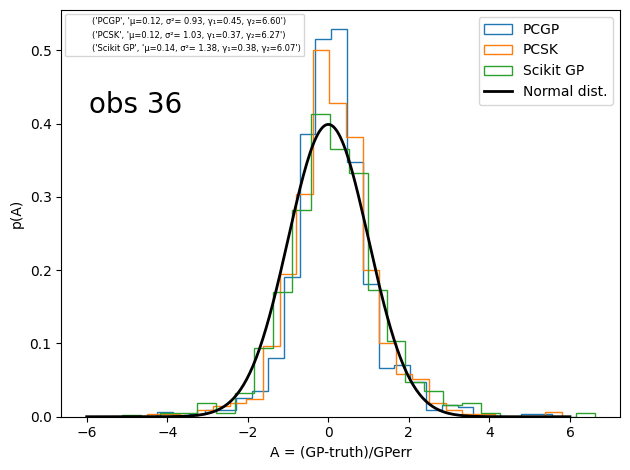

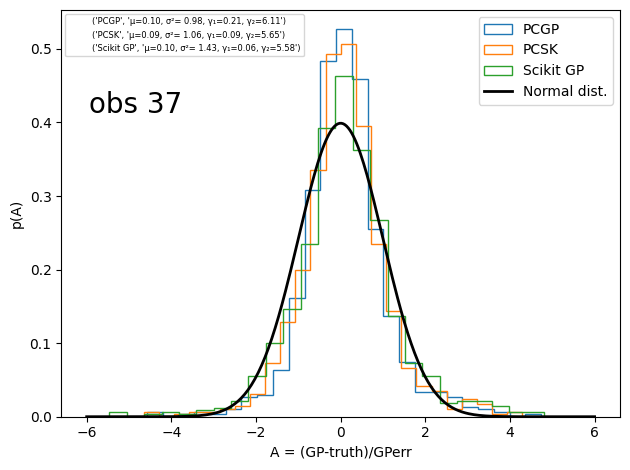

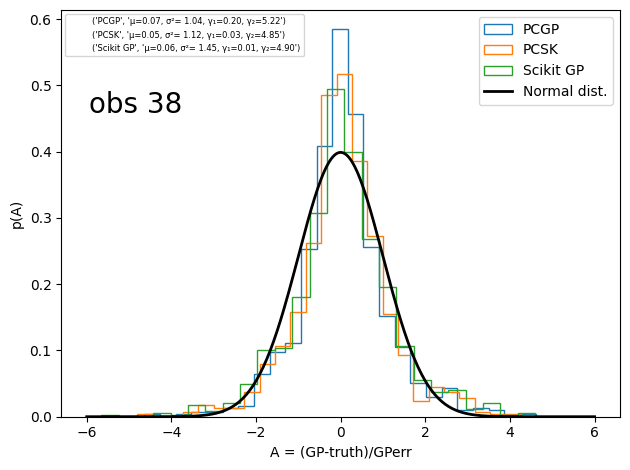

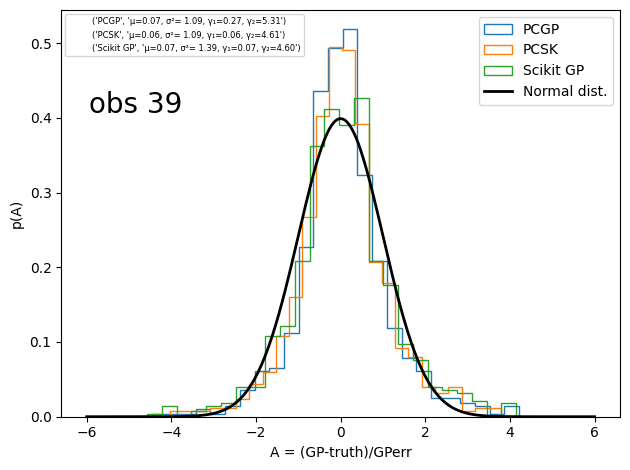

In [14]:
vali_vn = [vali_data_1_vn,vali_data_2_vn,vali_data_3_vn]
emu_vn = [emu_pred_1_vn, emu_pred_2_vn,emu_pred_2_vn]
emu_err_vn = [emu_pred_err_1_vn,emu_pred_err_2_vn,emu_pred_err_3_vn]
lab = ['PCGP', 'PCSK', 'Scikit GP']

plot_histogram_emulator_vs_truth_relative(vali_vn,emu_vn,emu_err_vn,lab)